In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Tensors

In [2]:
tf.constant([[1, 2, 3], [4, 5, 6]]) # Creates a tensor from a list

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [3]:
a = tf.zeros((2, 7)) # Creates a tensor with all elements set to zero
a

<tf.Tensor: shape=(2, 7), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [4]:
a.numpy() # Converts tf.tensor to numpy array

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [5]:
a = tf.random.uniform((2, 3)) # Creates a tensor filled with random values from a uniform distribution
a

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.17712998, 0.02031314, 0.02093458],
       [0.19306982, 0.3411144 , 0.17626691]], dtype=float32)>

In [6]:
b = tf.random.normal((3, 5)) # Creates a tensor filled with random values from a normal distribution.
b

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[-0.6125963 , -2.0040534 , -0.1401614 ,  1.3557155 ,  0.4719623 ],
       [-1.602494  , -0.34103814,  1.8855087 ,  0.51761615,  2.0374665 ],
       [-0.52743196,  1.9606841 ,  0.99635726, -0.35860237, -1.2479444 ]],
      dtype=float32)>

In [7]:
print(tf.reduce_max(a)) # Find the largest value

tf.Tensor(0.3411144, shape=(), dtype=float32)


In [8]:
tf.argmax(a) # Find the index of the largest value

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 1, 1])>

In [9]:
a.shape # Returns the shape of tensor

TensorShape([2, 3])

In [10]:
print(tf.size(a)) # Returns the size of tensor

tf.Tensor(6, shape=(), dtype=int32)


In [11]:
a.ndim # Returns the number of tensor dimensions

2

In [12]:
tf.reshape(a, (6, 1)) # Reshapes the tensor

<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[0.17712998],
       [0.02031314],
       [0.02093458],
       [0.19306982],
       [0.3411144 ],
       [0.17626691]], dtype=float32)>

In [13]:
tf.reshape(a, (-1))

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.17712998, 0.02031314, 0.02093458, 0.19306982, 0.3411144 ,
       0.17626691], dtype=float32)>

# Automatic Differentiation and Gradients

In [14]:
x = tf.constant(3.0)
x

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [0]:
with tf.GradientTape() as g:
    g.watch(x)
    y = x * x

In [0]:
dy_dx = g.gradient(y, x)

In [17]:
dy_dx.numpy()

6.0

# Keras

### Sequential

In [0]:
# Simple model
model = keras.Sequential()
# Adds a fully connected layer to the model
model.add(keras.layers.Dense(64, activation='relu'))
# Another one
model.add(keras.layers.Dense(10, activation='relu'))

### Optimizers

In [0]:
model.compile(optimizer=keras.optimizers.Adam(0.01), loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Fashion mnist

### Data

In [0]:
data = keras.datasets.fashion_mnist

In [21]:
(x_train, y_train), (x_test, y_test) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4989 - accuracy: 0.8253
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3742 - accuracy: 0.8657
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3374 - accuracy: 0.8779
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3125 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2960 - accuracy: 0.8908


In [27]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8730


[0.3547075092792511, 0.8730000257492065]

Network answer is:  Coat
  Right answer is:  Coat


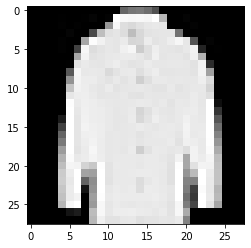

In [28]:
n = 14
print('Network answer is: ', labels[np.argmax(model.predict(np.array([x_test[n]])))])
print('  Right answer is: ', labels[y_test[n]])
plt.imshow(x_test[n], cmap=plt.cm.binary_r);